# DEEP LEARNING AND OBJECT DETECTION (VISION)

In this notebook I will note down all of the information necessary to understand the second phase of the project, as suitable to people with knowledge of Machine Learning as minimal as it gets (like myself).

## The Gist of Machine Learning

In a nutshell it is the domain of using algorithms to perform analysis on raw data and extract information out of it that help it *"learn"* and be capable of perdicting certain characteristics about data it does not know. Normal programs do the analysis and inference part regarding given data, the major difference is the *learning* aspect. This learning happens through training the *"machine"* with the given data, which has to be relatively large in volume and variety.

### For example

Suppose we want to scrap a bunch of articles on a specific news topic and find out the major sentiment of the public towards said topic. _Traditionally,_ this can be done by pre-defining what to look for in such articles and pre-classifying them into the different sentiment classes we have. The most simple classes would be negative and positive sentiment, and the most simple word sets for these classes would be negative words like negated words (--n't) or "sadly" and so on, and positive words such has "happily" and so on, which could be grabbed from a dictionary, but not really easily automatable, but the gist of it is just comparing their frequencies and doing a simple histogram of sentiments. Given we had two, the one with higher frequency would be considered most dominant.

_The Machine Learning way_ however goes with a slightly different approach: it builds these word sets on its own by being fed a different type of input, that is pre-classified news articles that may or may not be related to the given topic, with the task of knowing what _"features"_ that appear frequently in each article associate with the sentiment that was pre-classified by humans. This is called ***supervised learning***, since the data was pre-classified (i.e., the machine inherently knows right from wrong regarding the input data). Meanwhile, ***unsupervised learning*** is that which uses input data that is not pre-classified like the previous example. Thus, the machine is left on its own to try and guess the words that usually come together, without really knowing what sentiment they may belong to - it just groups them together into a class because they frequently popped up together per article in the input. More on learning types later.

## Deep Learning

Now, what makes Deep Learning "Deep"? It's just another type of Machine Learning, right? Well yes, it is the same idea; algorithms that learn from data, but these algorithms (also commonly called models in the field of ML) take inspiration from how our human brains work. _"In the brain, a typical neuron collect[s] signals from others through a host of fine structures called dendrites. The neuron sends out spikes of electrical activity through the axon which can split into thousands of branches. At the end of each branch, a synapse converts the activity from the axon into electrical effects that inhibit or excite activity on the contacted (target) neuron. When a neuron receives excitatory input that is sufficiently large compared with its inhibitory input, it sends a spike of electrical activity (an action potential) down its axon. Learning occurs by changing the effectiveness of the synapses so that the influence of one neuron on another changes."_ This is basically the model based on which Deep Learning algorithms are structured. So essentially, same concept of ML, with a specific algorithm structure: the _"artificial neural network (ANN)"_, and all the namings that come along with it following theme like _"artificial neurons"_ organized in input, output, and hidden layers; and the like. And like mentioned above, the model can be supervised or unsupervised. Observe the following image to see how the description of the human brain is abstracted into the ANN.

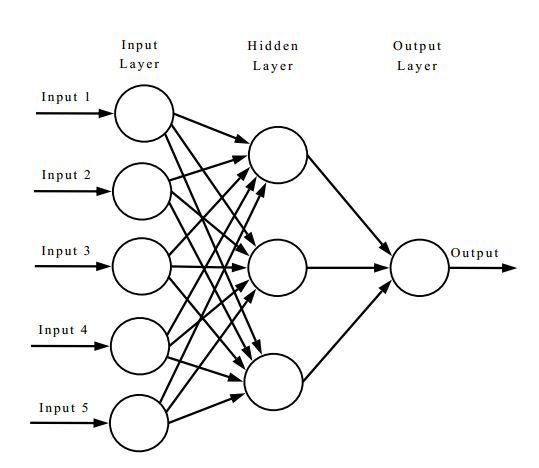!

The input layer has the input artificial neurons which are concerned with the different _"features"_ of the data, each one corresponding to a feature from the sample. As can be seen, each layer is conneted to the next through their inner nodes via directed arrows, which usually have weights attributed to them (initially randomized with uniform distribution, with variance of 1/n such that n is the number of nodes input to each node, per node), affecting how much each affects the next with a weighted sum fed into an activation function that decides whether the weighted sum is good enough to activate its node or not. The same is applied throughout all layers until the output layer is reached, which has output nodes with each node representing a class. Following the example from before, if we were classifying the articles to negative or positive overall sentiment, then we'd have two output nodes in this layer.

Aside from weights, there's also bias per neuron, which the network can learn and update the value of... but what are they? Well, they're the activation threshold values per node that determine whether the node will fire or not, or more accurately by how much would it be activated. The bias value enters the activation function as some constant offset to be added to the weighted sum of the node's inputs, before the activation function evaluates and transforms the weighted sum.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.utils import plot_model
from keras_visualizer import visualizer 

model = Sequential(
    [
        # units of output, input (to this layer, only needed for initial layer), activation function
        Dense(units=6, input_shape=(3,), activation='relu'),
        Dense(units=2, activation='relu'),
    ]
)
# plot_model(model, show_shapes=True, show_layer_names=True)
visualizer(model, format='png', view=True)

The visualization of the above model is:

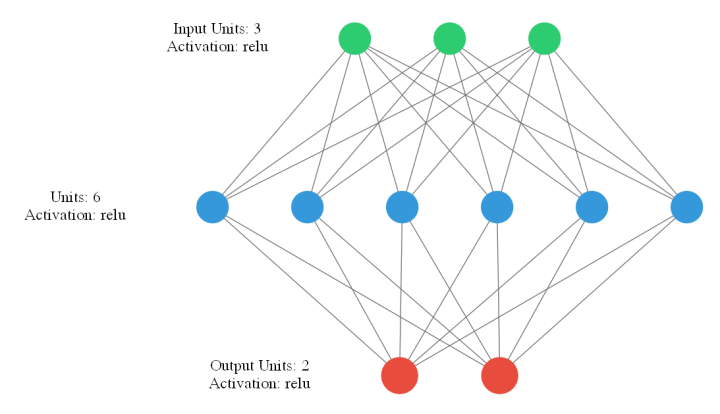

These DL models have different types (aside from the supervision category) based on their design choices (in terms of architecture and layer types as well as activation functions), such as:

### Examples on architecture types

#### Sequential Model

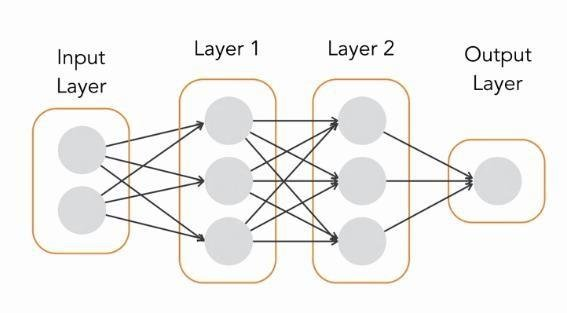

This type is perhaps the simplest, and it is just a linear stack of layers of artificial neurons (or neurons, or nodes, for short).

#### Siamese Model

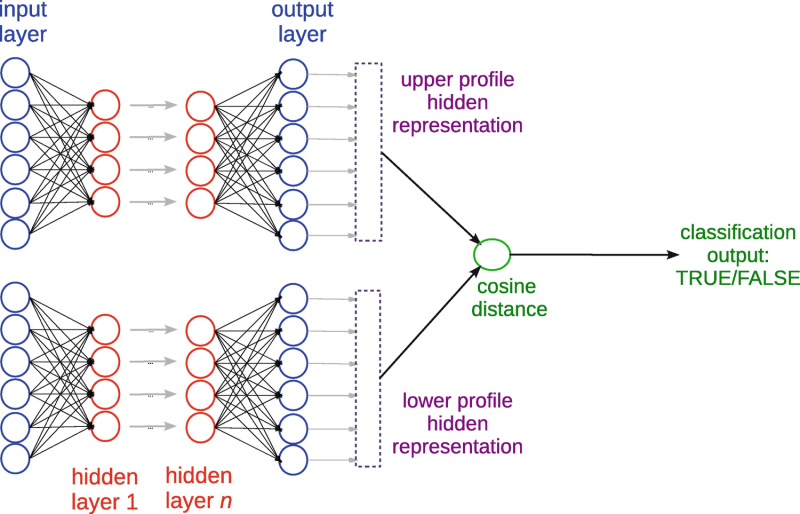

_"A Siamese neural network is an artificial neural network that uses the same weights while working in tandem on two different input vectors to compute comparable output vectors. Often one of the output vectors is precomputed, thus forming a baseline against which the other output vector is compared."_

This type is perhaps the simplest, and it is just a linear stack of layers of artificial neurons (or neurons, or nodes, for short).

### Examples on layer types

#### Dense (fully-connected) layers

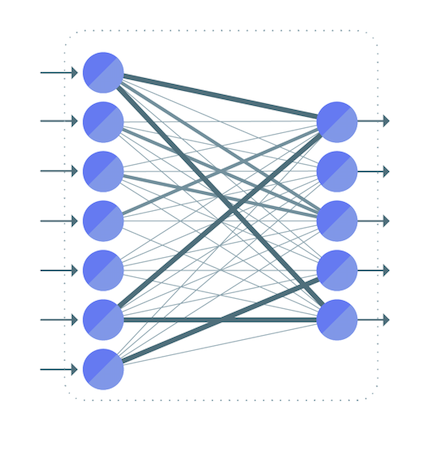

In this layer type every neuron has to be connected to every neuron in the following layer. This is perhaps the most popular and most commonly used type in neural networks regardless of their architecture. But don't let that fool you though, they can very easily get computationally expensive as their input grows due to the sheer amount of connections required, massively increasing the number of vector operations needed to be done for the learning process, giving performance and perhaps scalability issues. Their common use-case is classifying image data in computer vision when used in convolutional neural networks (more on them later), and also for experimentation purposes.

#### Convolution layers

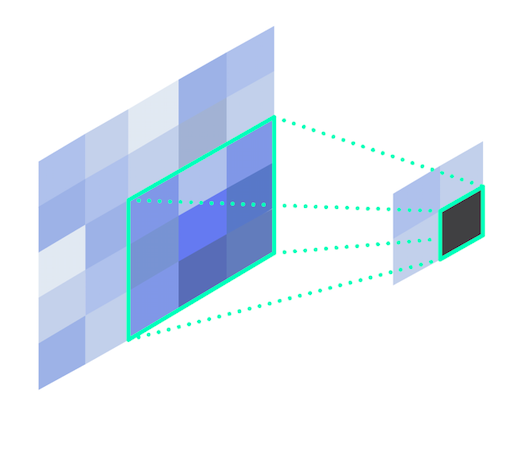

This layer type is most used in convolutional neural networks, obviously, as the names relate. The main use-case is feature detection and object recognition/classification in the input images by applying a filter as shown above to go over an image within the range of the filter's window, returning a map of classified features. The filter/kernel is made of weights and convoluted against the image in steps called "strides", as we know from image processing. In this use-case, the filter basically describes the probabilities that a given pattern of pixels represents a feature. More about this layer type will be discussed in the CNN section.

### Examples on activation functions

As explained earlier, the activation function for an ANN is used to determine whether the current node will be activated or not based on its set of inputs, such as by comparing their weighted sum to some threshold value. The comparison could include a transformation of the weighted some to some range in some way. This simulates the part explained above concerning the analogy of the ANN to the human brain regarding how neurons activate based on specific stimulus and how much of it there is. The output doesn't necessarily have to be strictly on or off, it can be somewhere in between... this all depends on the transformation part, and the activation function as a whole. Let's see some examples.

#### Sigmoid / logistic function

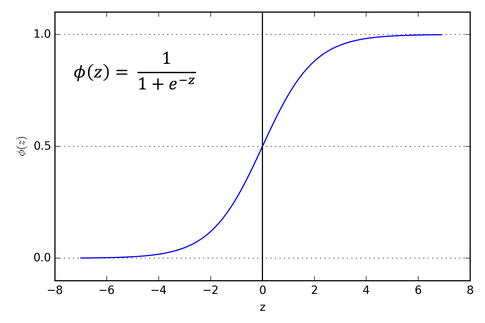

The sigmoid function takes negative values and makes them tend to 0.0 while positive values are made to tend to 1.0, it is used to predict probability as an output, since the range of probability fits the range of the function nicely.

#### ReLU function

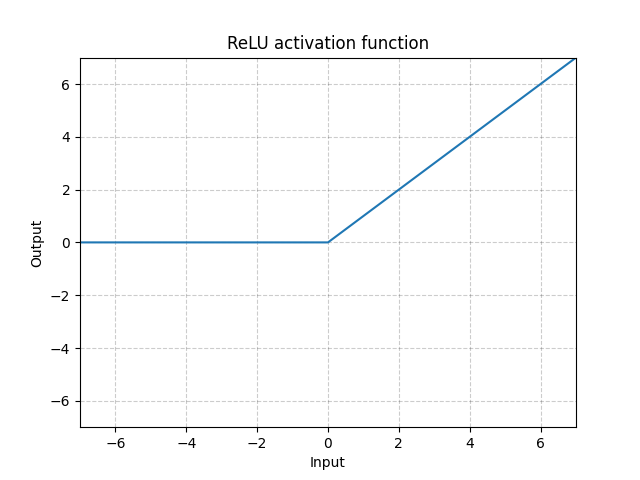

_"The **Re**ctified **L**inear **U**nit activation function is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero."_ The main issue with this function is that negative values are zeroed, limiting the amount of information that may have been extracted from them, effectively decreasing the ability of the model to fit or train from the data properly since it can't map the negative values appropriately.

### Leaky ReLU function

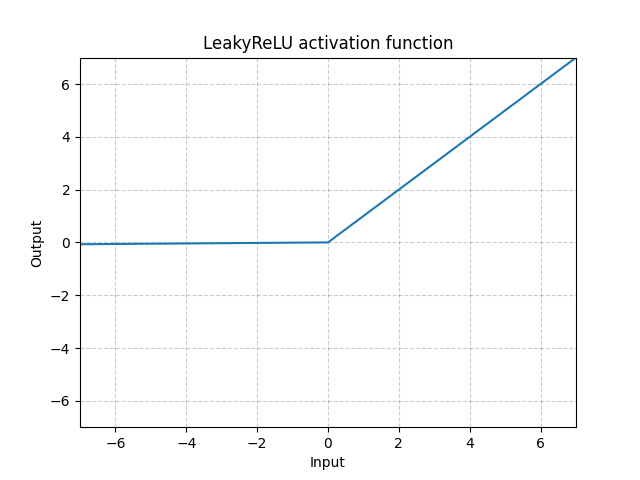

The leaky version of the ReLU function exists to solve the issue I just mentioned earlier, where the negative values get zeroed in the normal function. Try to focus on the image, specifically the 0 line. The function ***slightly*** goes below 0 in the negative input values, and that is the fix to the ReLU function.

### Examples on categorical variable encoding

Let's now discuss how exactly is the data "labelled" such that it can be used later in the model for comparison and such (as will be explained). This problem is called encoding the data, and we need to do so because we need to represent the labels one way or another that can be interpreted by the model easily. There are several encoding schemes, and I'll go through a few of them. The leak helps to increase the range of the ReLU function. The leak is usually the relation between input and output with a factor of 0.01, but it can be other values.

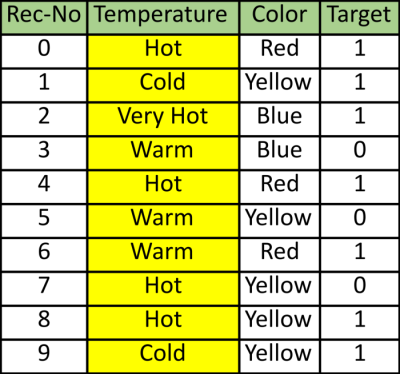

Categorical variables are either nominal (most usually resembling types of things that have no implicit order, like orange; apple; tomato; or countries, etc.) and ordinal (most usually implicitly ordered like ratings, sizes, etc.). For the above example, weather conditions could be ordinal if we consider heat to be the axis by which the types are ordered, so for example, we can have cold --> warm --> hot --> very hot.

#### Label encoding

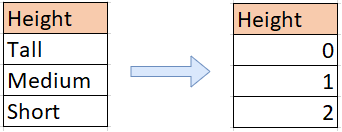

This is perhaps the most basic and intuitive encoding scheme, where we map the categories to numbers directly, as shown in the figure above. As mentioned previously, the temperature category could be regarded as an ordinal category, so let's represent it as so with the four categories being mapped respectively to 0 --> 1 --> 2 --> 3, as shown next.

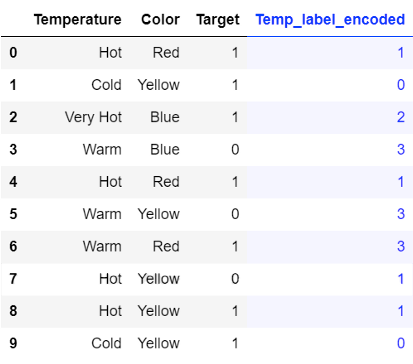

#### One-hot encoding

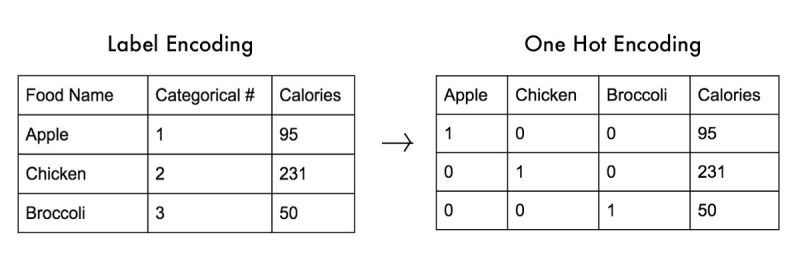

In this encoding technique, the data vector has a length of the classes to be classified + whatever data categories are attributed to each class, where each class will be presented by an element in the vector, and only the class that is correct will be set to 1 with the rest as 0s, and the data categories will obviously be set to their value. For example, observe the rows in the one-hot encoding example above, where each row has the three classes (apple/chicken/broccoli) with only and exactly one of them being set at a time per row, and they all have the data column representing their data value for the Calories category as an example. So now instead of the categorical number column that mapped each food type to an arbitrary number (since this is nominal, so there's no order like in the previous example), we now have one-hot encoding using three columns, which also have an arbitrary order.

To continue with the running example, one-hot encoding would look like this, where each category value is now encoded in a column of its own, and in the category rows only one value column must be set.

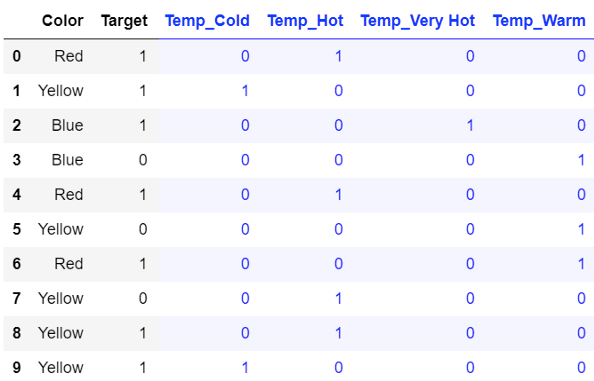

As mentioned, most algorithms need to convert data into numerical values, hence the need for encoding. And each encoding technique has its performance effects on the algorithm. For example, this one-hot encoding technique has a very obvious problem with its rapidly increasing size; too many zeroes; vector too sparse... Another limitation of one-hot encoding is that the vectors must be equidistant. This is not always the case for all datasets, where some categories could be a little similar to each other compared to other categories. The equidistance problems considers them all as, well, equally distant from each other in similarity. There are other more technical problems, but that doesn't make one-hot encoding bad, it simply is suitable for certain models and unsuitable for others, and so is the case for all techniques. From this point, let's discuss an encoding technique that is on the opposite spectrum (concept-wise) of one-hot encoding.

#### Mean (target) encoding

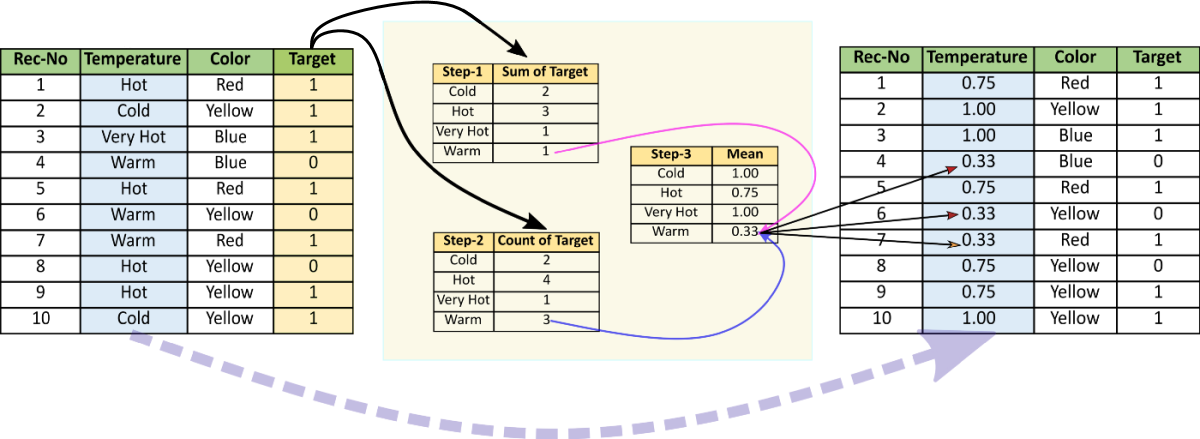

Mean encoding is similar to label encoding, except here labels are correlated directly with the target instead of being given arbitrary values (that may or may not be ordered based on the ordinality of the data). In the basic version of this technique, each label is encoded with the mean value of the target variable on training data. The steps for doing this are simple:

0. Select the variable to encode, for example here we want to transform Temperature, marked in blue
1. Calculate the sum of the Target class per each value of the variable to be encoded
2. Calculate the count of each value of it
3. Divide 1. by 2.
4. Use the mean values you got in step 3 as the encoded values representing the category you've chosen

Mean encoding is known to be prone to over-fitting in practice and hence validation is usually required when it is used. In generla though, mean encoding relates the target with the label as it tends to group similar classes unlike label encoding which is just arbitrary encoding for the most part. Usually, mean encoding could is the simpler alternative of the two. There are many variations of this target encoding in practice.

Here's the output for the running example:

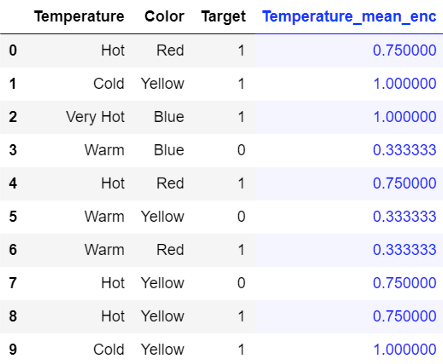

## Training, Learning, Predicting...

Earlier I mentioned that a model has weighted edges connecting the different neurons in each of its layers, and that a basic part of Machine Learning is the training part. Well, those two are related! These weights are actually the output of this training, because they're what do all the magic! And that too has its own design dilemma, namely picking the ***optimization algorithm*** that would produce the best weight combination, such as the popular ***Stochastic Gradient Decent (SGD) optimizer***, whose objective is to minimize some arbitrary loss function associated with the weight combination, like the error for example; which would be how far off we are from the expected result (in the case of supervised learning), and that won't be in the form of yes-no results, it would be probabilities, so the calculation is how far off these probabilities are from the actual data labels.

Optimizers like SGD need the input data to pass multiple times for the best weights to be finalized; each pass being called an ***"epoch"*** of learning. In each epoch, each weight gets some heuristic value describing its accuracy, like in SGD the gradient (derivative) of the loss function to the weight value. The gradient is multiplied by the ***learning rate*** which ranges from 0.1 to 0.0001, deciding how slow or fast the evolution of the optimizer is (and hence how much quality the final weight combination will have).

**Let's discuss this concept of "loss" in more depth:** The loss function is run after each epoch to compare between the given input and its actual output vs. the network's output, for example if we apply this on our running example, and say the input was an article with a negative consensus, and the network classified it as 80% negative, then we have a 20% error. Let's have a real example to make things clearer; the ***mean-squares error (MSE)*** loss function.

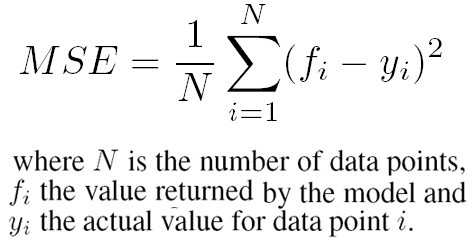

For input in the sample (training) dataset we get the error between its label and the network's output label, then we square it, and sum the squared errors of all other input-output pairs, and finally get their mean (average), as modeled by the equation above. It is to be noted that all loss functions behave similarly; just differing in the algorithm by which the errors are calculated and averaged. But anyway, with the MSE loss function and SGD optimizer, we want to see a decreasing value for the MSR every epoch, and SGD should work on that.

**Now let's also discuss the concept of "learning rate" in more depth:** Usually, the very first epoch gives terrible results (based on its MSE value) and the SGD needs to work hard to improve on it. This is where the learning rate comes in. The MSR tells us that we're far off the best result by some value, but that value in terms of the output, not the input that led to it. In other words, we know the direction we should move in, but not the magnitude of it. That is why we have to approach very slowly _(although as I write this I got an idea of varying the learning rate based on how much difference in the gradient occurs -- maybe I could look into that in the future, if it's not already implemented...)_ so that we don't miss the local minimum. Observe the following figure (note the movement in terms of X and Y axes)...

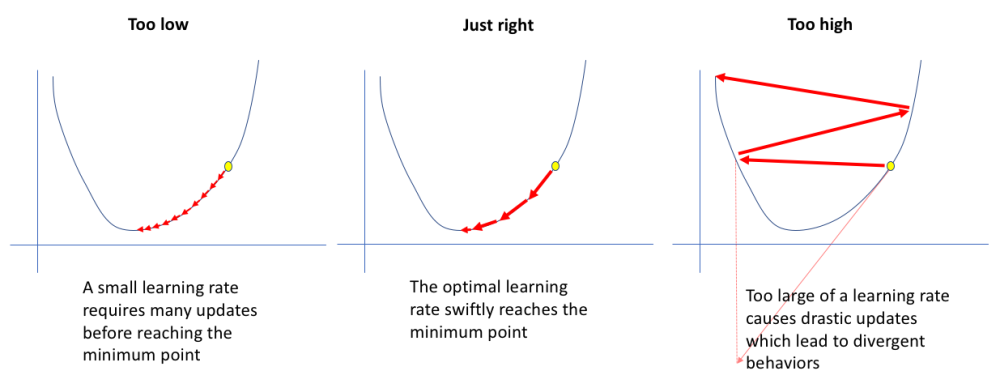

This is a very crucial hyper-paramter to get right, and as mentioned earlier an acceptable range is 0.0001 to 0.1, usually best in the lower side of the range though. There are obviously other paramters and aspects to be concerned with, such as avoiding overfitting among many possible problems (which can be achieved by using part of the sample dataset as a validation dataset; which is obviously labeled like the raining dataset; and it is not used in the feedback loop of the training procedure like the training dataset, but is regularly evaluated to ensure the model is not overfitting... some other solutions are to increase the variety and/or volume of the training dataset, with new test data or augmented test data generated from the original test data but mutated slightly via geometric transformations like translation, rotation, mirroring, scaling, or color transformations, etc., or we can simplify some of the hidden layers or reduce the number of neurons per layer, or drop out (disable(?)) some nodes from hidden layers, among many other ideas).

For supervised learning, the prediction part is simply to provide part of the sample dataset (that was not used in training, and is also not the validation dataset) without its labels and see how well the model we have at that moment manages to classify it.

## But... this is all supervised!

Most of what I've discussed so far was supervised learning, so how do we do all of these procedures if it were unsupervised (or perhaps semi-supervised)? In other words, here we don't have labels, and hence we don't have the MSE, and hence no accuracy metric for an optimizer like SGD to work with, so _what do_ we work with in this case? Well, as very quickly mentioned before, unsupervised learning operates slightly different... it tries to figure out on its own points of similarity in the features of the dataset, and labels them (obviously arbitrarily) into different groups/classes based on how similar they seem to be. Does that guarantee that they'd actually be labeled correctly? Not necessarily, it all depends on the features that the model will be evaluating. But, how's the optimization done then? i.e., on what basis?

Let's use the example of clustering to illustrate how it works... 

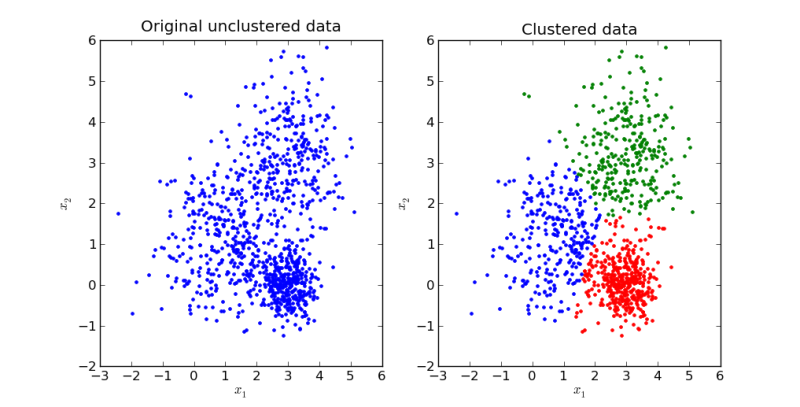

On the left, you can see data that - to most humans - is very random and has no useful information. For the computer though, all it sees is data and inputs that are similar and dissimilar with certain amounts, and the model works on identifying the groups that have a good enough level of similarity to be considered a class of output, despite not knowing whether that class is real or not, if it maps to something in reality or not, etc.. All it focuses on is mapping the _input_ to one of the _clusters_ that it makes. And so, the optimization could perhaps be done to maximize the similarity between the different outputs in the one group, whichever way it was calculated.

A hybrid between the two approaches is "semi-supervised" learning. It makes use of two datasets, one labelled and the other unlabelled, and trains on both simultaneously. This should remind you of the Siamese Model I've used as an example earlier, where the labelled dataset will serve as the sanity check for the unlabelled dataset, much like how there was a baseline in the Siamese Model using a pre-computed network that is compared against by the unlabelled dataset. So, this could be another way for the optimization process.

## Convolutional neural networks

Also go by CNNs or ConvNets, and they're a type of neural networks known for being specialized at detecting patterns in the input data. What makes it specialized is the fact that, unlike ANNs, the hidden layers in CNNs are "convolutional" and serve exactly that special purpose of pattern detection. What this means is that the transformation procedure (mentioned in the layers of ANN) is convolution in the case of CNN, and from our experience in image processing, this means all sorts of filters and such are doable here, since they are based on convolution. As for the patterns that get detected, well, also from the domain of image processing we can say they are edges, corners, circles, squares, objects, etc.. Usually, simpler detections are done in the earlier layers, while more advanced ones come later, which makes sense since the simpler detections most likely are pre-processing the data for the later more complex detections to work out properly... We're almost getting there! Detecting objects, the target of this long journey... Let's go through some helpful concepts.

### Filter padding

As we know in image processing, filters occur on multiple pixels and their dot product is placed at the center pixel of the window. However, edge pixels are also taken into consideration, but these do not have neighbors in the edge direction. Hence, we need padding or else we won't place anything at these locations (and thus after multiple applications of filters the picture will shrink into nothingness!). In Keras API, there are two types of padding: ***Valid*** and ***Same***, where valid means the image size decreases as filters process it, while same adds padding to make the output image size same as the input size.

### Max pooling

After a convolutional layer is done applying its filter(s), it is advantageous to reduce the dimensions of the image. This is called "max pooling". In it we supposedly take "pools" (very bad naming) of some arbitrary size and take the maximum value within these pools and discard the rest. We also define a "stride" value which defines the hop size of the pooling. Obseve the following figure to visualize this description... The "pools" are colored for better viewability.

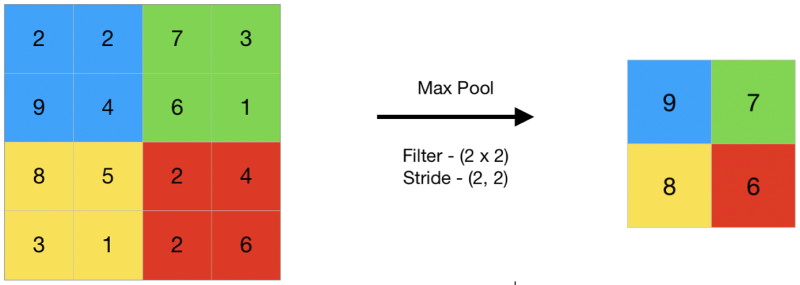

But why do this? Well, the dimensions are reduced, hence better performance, while leaving in the most important parts (which are the "max" values in every pool). It also reduces over-fitting, since this "compression" technically introduces new features that weren't explicitly part of the original input, and thus it becomes somewhat more generic. There are other types of pooling, such as average pooling, but max pooling is supposedly the most useful among them. Obviously, pooling requires no padding, and is not related to it anyway.

### Propagation

This is a very important concept in CNNs. Remember how the loss function works? Some gradient is multipled to the weight of the connecting edge then the product is multipled by the learning rate then added to the existing value of the weight to get the value to be used in the next epoch... Remember all that? Well now it's time to know where that gradient comes from. There are two types of propagation, forward and backward. The forward one is pretty straight-forward (pun intended), the activation function is applied on the weight sum of the inputs and the node gives output to the next layer, simple as that. Back propgatiaon however is a tad bit more complex...

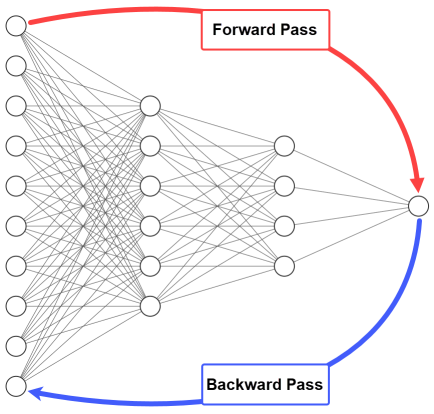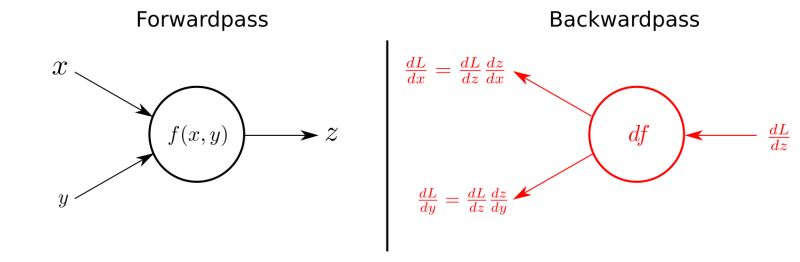

Back in the learning/training section the gradient was said to be calculated through the derivative of the loss to the weight of the edge, and this is where backpropagation appears: how do we use that value to tune the weights for the next epochs? Well, the output nodes get the loss value calculated for them, checks which output node is actually supposed to be active compared to the input label, decides that it will change the weights inputted to it to increase its activation while making sure that this change decreases the activation for the other nodes which should not be firing. We can conclude from this that back propagation changes all the weights to find the perfect combination that can achieve what is required (if possible), and not just change all the weights equally by some value. What I've just explained is what happens ***per input*** to the network. This repeats for all inputs till we have the new set of weights for the new epoch, to be used with all new inputs in it. So, in the end, maybe some input-output pairs end up biasing the network to making one input-output pair fair worse in the next epoch. Everything is possible, hence the learning rate stuff we talked about, do it slow till it works out for everyone.

### Learnable parameters in CNNs

I've previously talked about some of the learnable parameters such as the weights and biases between and of neurons. In CNNs, new parameters are taken into consideration, which are the values of filters per node per layer, specifically the size. So for example, a 3x3 filter contributes 9 learning parameters in addition to the weights and biases of the system. In general, the learnable parameters of a CNN can be summarized, per layer, as: the input nodes (if from a dense layer) or input filters (if from a conv one), the layer nodes (if dense) or layer filters (if conv) as well as the number of elements in the filter (i.e., its size/dimensions), the weights connecting these input and layer nodes/filters, and finally the biases per node/filter activation function.

## Detection vs. Localization?

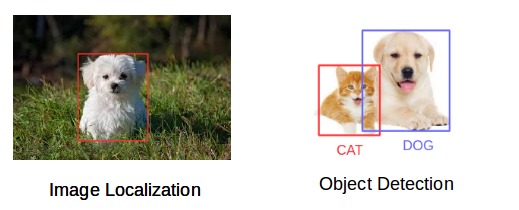

**Image Localization** is all about finding a *single object* in the image, determining its location and boundaries (usually represented by drawing a box around it like the reference image above), without classifying it into any type. **Object Detection** on the other hand adds to Image Localization the requirement of finding *all objects* - that the algorithm knows - in the given image as well as classify each object into its type (like the cat and dog classifications and boundaries shown above).

Now that we know how CNNs work, it's easy to realize that we'll need a CNN to do image localization. Let's get into the specifics of said CNN, more accurately its outputs... The outputs expected from such CNN would be a node per class detectable and four nodes describing the location of the object in the image (either x and y coordinates of two points at opposite corners, or maybe a center point and the width and height?). Of course, the loss function for each type of output needs to be thought about well, since they are different types of outputs (some are classes, some are coordinates, some are width/height values).

Cool, what about **object detection?** Obviously, we can't do the same thing since image localization only gives one output, the box and the type of the object, but what if we want to detect an arbitrary number of them? One solution is ***sliding windows*** where we just detect portions of the image and stitch them together in the end. Literally splitting the input image into smaller size images (usually squares, and usually a window is sliding over the image, not actually smaller images) and checking each and every one of them for the local object, then merging the results. Sounds very intuitive and natural, the basic next step in thinking really... And obviously, it doesn't work that well, and requires too much computation power to cover all the bounding boxes sizes and keep moving them over the image time after time. In addition to that obvious problem, another is the fact that one object may be detected multiple times by different windows. Unreliable results!

## R-CNN, FastR-CNN, FasterR-CNN

An improvement to the sliding window implementation of the CNN for object detection was to use a ***regional*** CNN (R-CNN) concept where the algorithm first extracts some candidate regions that are expected to contain objects, and then detect the objects in them. The network in this case learns where to look for regions in addition to the object detection, perhaps based on the accuracy of the detected objects and such other metrics, so - that seems better yeah, but still sounds inefficient for the most part in terms of computation power requirements. The very first version of R-CNN would deterministically select these regions actually, and to me that sounds like we've barely done any improvement. In came ***Fast R-CNN***, which did the same thing but just optimized the region testing by using one CNN and a sliding window instead of multiple CNNs on different split up images like the vanilla R-CNN does. Good improvement, but still more to come! Then came ***Faster R-CNN*** which made the region-selection problem part of the general neural network's problem to be solved. This sub-problem is proposed to be solved by ***"Region Proposal Networks (RPN)"*** to be used as part of the workflow of the R-CNN, to provide it its 'R'. Though, still, even with Faster R-CNN, it's still not that fast enough for real-time purposes...

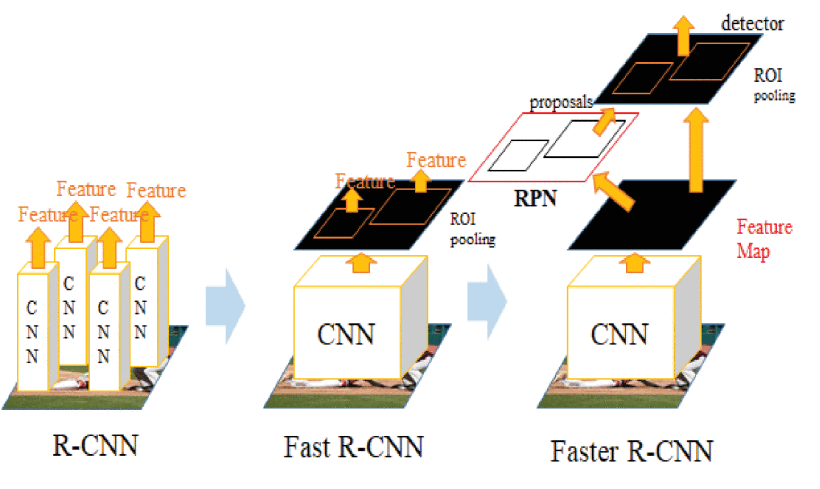

## You Only Look Once (YOLO)

YOLO comes in with a break-through change in how things work. Ditching the concept of R-CNNs, the algorithm uses the more basic CNN to detect objects in a single forward propagation through the CNN; as the name entails. How does it do it so easily and so fast? Well, essentially the algorithm splits the image into a grid of some arbitrary size, where each cell is - on its own - responsible for predicting whether or not the center of an object's boundary box exists inside, in addition to the description of said boundary box; like its width and height (this gives us **the potential bounding boxes and the confidence of each**), as well as determining the probability of what object among the classes it detects is the cell expected to be part of (this gives the **cell probability mapping**). Observe the next figure for better visualization of the aforementioned concepts. These two outputs enter some black magic processing and end up giving us the final agreed upon boundary boxes, in real-time! Of course, nothing is perfect, and this algorithm could end up designating multiple centers to one object as multiple different cells may "think" they are the center of the object in question. There are ways of dealing with these problems though, more on that later.

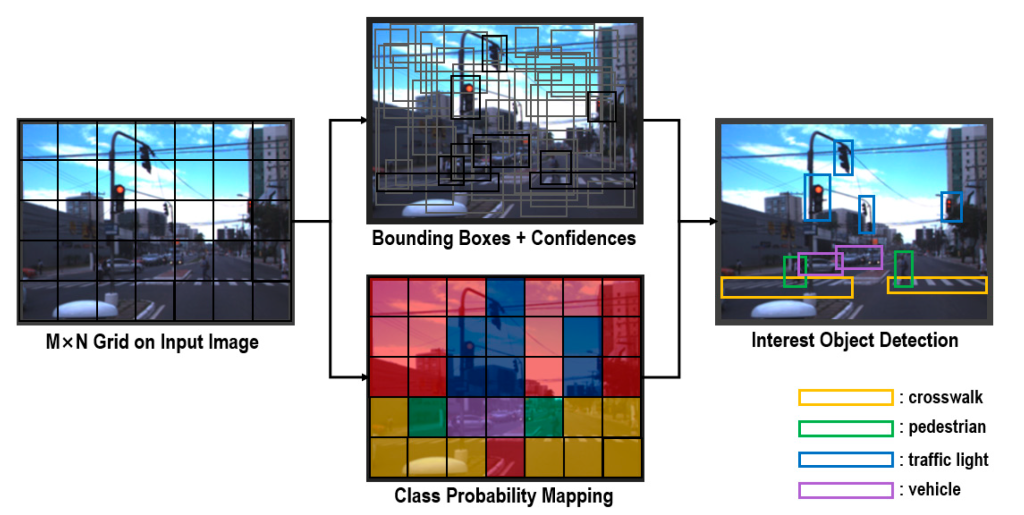

*There are five versions of YOLO as of the time of the making of this notebook, since 2015-2016.*

## Vision Transformers (ViT)

Ok, how about we ditch CNNs altogether? That's what's done in ViT, the authors decided to use the transformer technique that was typically previously used in applications in the field of natural language processing (NLP)... It was conventional that CNNs are the best for vision networks, but these authors want to prove this wrong -- and they did, using a sufficiently large (around 100M samples) dataset with their NLP-based transformer neural network architecture. *The main problem that is tackled in transformers is the fact that we want to make use of modern-day GPUs (parallelizable workflows) for sequential input, usually text or speech.* Let's break down how this issue even came into existence and then see how transformers deal with them in the NLP domain, then see how it entered the vision domain as well.

### Recurrent neural networks (RNNs)

First we need to discuss what an RNN is (it will make sense why we need to do so later). It is mainly used in applications such as natural language processing, voice assistance through speech recognition, language translation, moving objects in images, moving stocks ratings, etc.. What is common between all those is: ***sequences*** in time. Well, RNNs take as input sequential data, where the whole data segment could be split into chunks of sequential portions and fed to the neural network. What's different in this type of network is how sequential memory works. For example, we can much easily spit out the alphabet from memory when in sequence, but start at an arbitrary letter or do it in reverse and you'll struggle; you were not *trained* on the sequence *in this form*. And as mentioned before, neural networks are all about replicating the functionalities of the brain, so, we want to replicate this idea of sequential memory here so that we can use it for sequential data...

Coool, but how does this neural network type replicate human sequential memory? Observe...

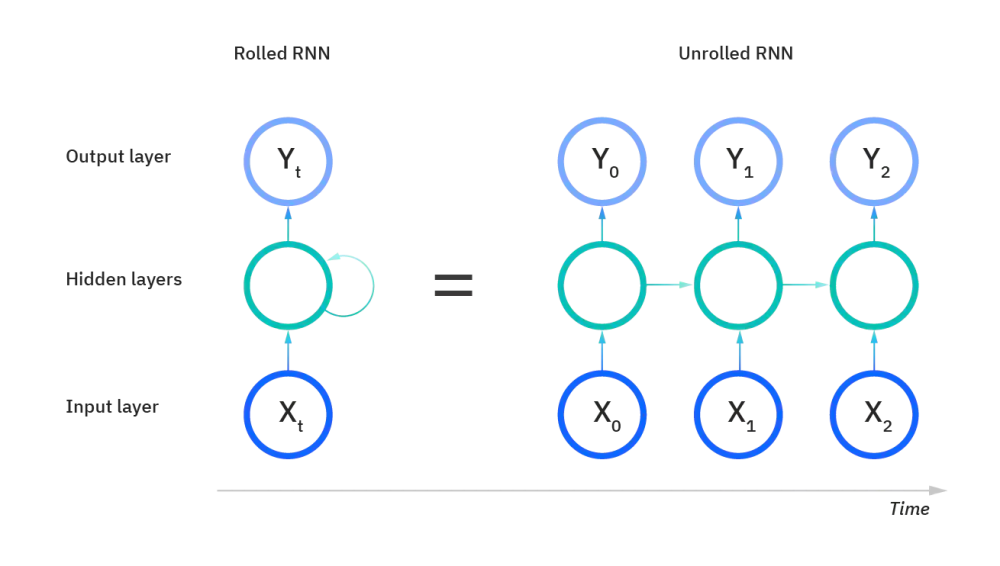

The trick is in the loop within the hidden layers, which makes each pass through the network use information from the previous one, which thus helps each pass have some understanding of its position in terms of the sequence and build upon this some learning model that uses that order in the sequence to extract whatever information it can extract. There are two problems with RNNs though, the first is its inability to follow through with long-term dependencies (more on it next) and the second is the incredibly slow learning time due to the need to propagate over all passes in the sequence of analysis, and not just per-pass every pass. In fact, it is too unbearable that said propagation is usually cut off at some threshold number of past passes.

#### Long short-term memory (LSTM) cells in RNNs

This is a variant architecture of RNNs that attempts to address the problem of long-term dependencies. That is, if the previous state that is influencing the current prediction is not in the recent past, the RNN model may not be able to accurately predict the current state. As an example, let’s say we wanted to predict the italicized words in following, “Alice is allergic to nuts. She can’t eat *peanut butter*.” The context of a nut allergy can help us anticipate that the food that cannot be eaten contains nuts. However, if that context was a few sentences prior, then it would make it difficult, or even impossible, for the RNN to connect the information, due to how back-propagation works... remember the gradient and learning rate and all those multipliers, what do you think happens as they stack through the different passes (in which case the process is called back propagation through time)? Very old information ceases to exist, basically. To remedy this, LSTMs have “cells” in the hidden layers of the neural network, which have three gates–an input gate, an output gate, and a forget gate. These gates control the flow of information which is needed to predict the output in the network. For example, if gender pronouns, such as “she”, was repeated multiple times in prior sentences, you may exclude that from the cell state.

#### Gated recurrent units (GRUs) in RNNs

This variant is similar to LSTMs since it addresses the same problem. Instead of using a “cell state” to regulate information, it uses hidden states, and instead of three gates, it has two: a reset gate and an update gate. Similar to the gates within LSTMs, the reset and update gates control how much and which information to retain.

Example uses of RNNs are vector to sequence, for example an image is sequentially analyzed to produce a sequence of words describing it. There's also the opposite of this, which fits the example from way earlier in this document about sentiment analysis in reports. It could read words in articles sequentially then decide the probabilities for bad/good sentiment in a two-cell vector. The more popular approach however is a mix of these two, where we use a sequential input and get a sequential output. This is what's used in actual applications, like translation and speech recognition.

### Transformers 

So far, the described RNNs with the suggested long-term dependency issues fixes are still very computationally slow due to the large number of propagations required. In fact, those suggested fixes make introduce overhead that makes it even slower due to their sequential input requirements! So in comes the transformer neural network architecture in 2017. The initial thought process is the same as in CNNs, where we encode our labels with some encoding technique as those discussed - in transformers we call this ***embedding***, not encoding, whereas encoding means something else... but embedding focuses on mapping words with similar or related meanings into numerically close clusters, and far ones into far ones, obviously... - but in classic RNNs we need to do that in sequence since the encoding of a certain input requires information about the input of the previous time-step. In transformers, we encode everything simultaneously and remove this dependency. *How do we keep memory then?*

We do so by taking into consideration the position (order) of the sequence item within the sequence. Since at all times we know the positions of all words in a sentence, we no longer have any dependencies on time-steps. As for the position, it is encoded by some function that takes as input the actual position and maps it to some uninque code. This is called ***position encoding***, which ~~encodes~~ embeds our labels not only into the network-readable vectors or whatever as mentioned in encoding techniques above, it also includes information corresponding to the position of the label itself in the sequence. So, we now have information about the label and its position in the sequence. This is basic NLP though, so at this point, we get the very famous: ***ATTENTION IS ALL YOU NEED***.

If you notice, at this point we haven't really done the same thing as RNNs, which is to use information from previous passes in following passes, we only got data about the label (which is common between the two) and the position of the label (which is new but not at all as informative as the memory aspect). The actual part which replaces this sequential way of doing memory dependencies is the concept of attention, and its variants self-attention and multi-head attention. Observe the following example.

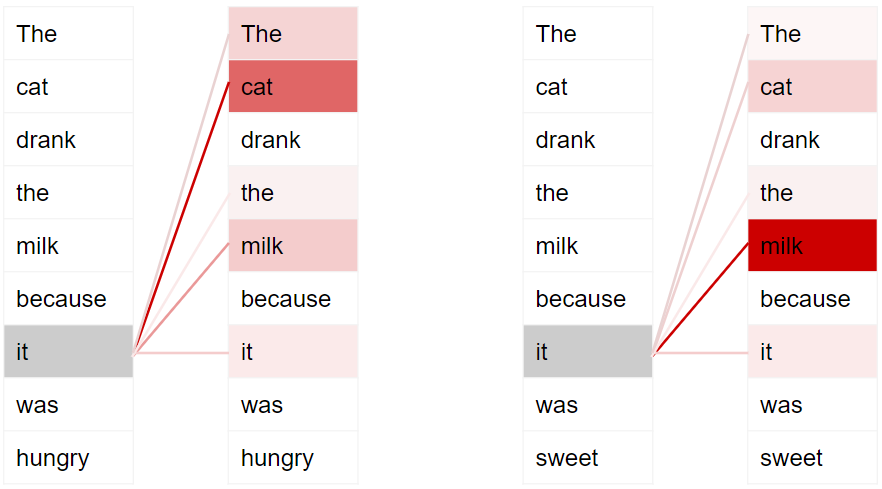

What does the word "it" refer to among the other words in the sentence? This is self-attention. This can be used most to figure out the grammatical rules of a language. When it is done between different sentences, it is just called attention, and in that case that attention corresponds to the relation between different words in one sentence and their seemingly corresponding words in the other sentence. This can be used most to figure out the translation rules between two languages. Note that you are not limited to one 'attention', called attention head, per pass, you can actually do what is called ***multi-headed self-attention***, which just combines the results and processes them simultaneously, giving in output a matrix outline the association between every single word with the other words. Note that the attention mechanism does not suffer from the short-term memory dependency issues mentioned before provided enough resources (infinite memory in theory!). Anyway, attention is used in three places:
1. Self-attention in the Encoder stage — the input sequence pays attention to itself
2. Self-attention in the Decoder stage — the target sequence pays attention to itself
3. Encoder-Decoder-attention in the Decoder stage — the target sequence pays attention to the input sequence

But, how does the network do this association between words? Well without getting into much detail, after we get the embedding and position encoding result, we get a triplet for the input, comprising of value; key; and query. I don't know what each of them resembles and how they're used in the computation, but the moral of the story is that they're the input to attention modules and they are learnable parameters (similar to weights) that can be trained given a pre-defined set of images to work on. The encompassing entity is called an ***encoder*** where a stack of encoders is used; the first one receives its input from the Embedding and Position Encoding, while the others receive their input from their respective previous encoder. As for a ***decoder***, the process is similar but from a different start point: the first decoder receives its input from the embedding and position encoding of the output, and the following decoders use each other's values as inputs.

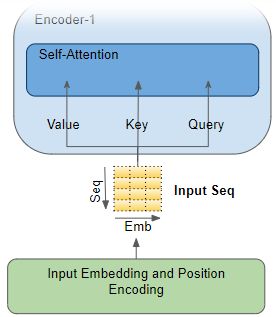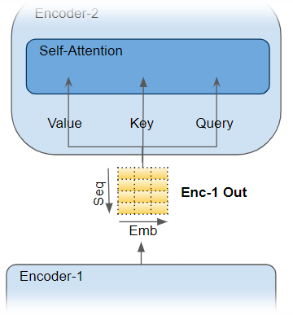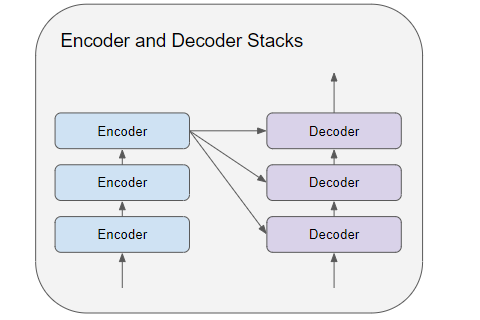

### Okay, now vision

So far, we talked about transformers. Text data. Where are the images? Where's the vision in Vision Transformers? Well, in comes the new state of the art vision transformer. **An image is worth 16x16 words.** That's the gist of it, but obviously we'll break it down. First, we define a window size (called *patch* in ViT terms) and a stride to slide the window with over the input image (representing the sequence of data for the RNN). The patches that are extracted from this sliding window (in order since we're still doing sequential memorizing after all!) are then each turned from their 2d shape into a 1d vector. The different vectors for each image are then fed into _a dense layer that is shared between them all in its learnable parameters._ That dense layer is essentially the ViT.

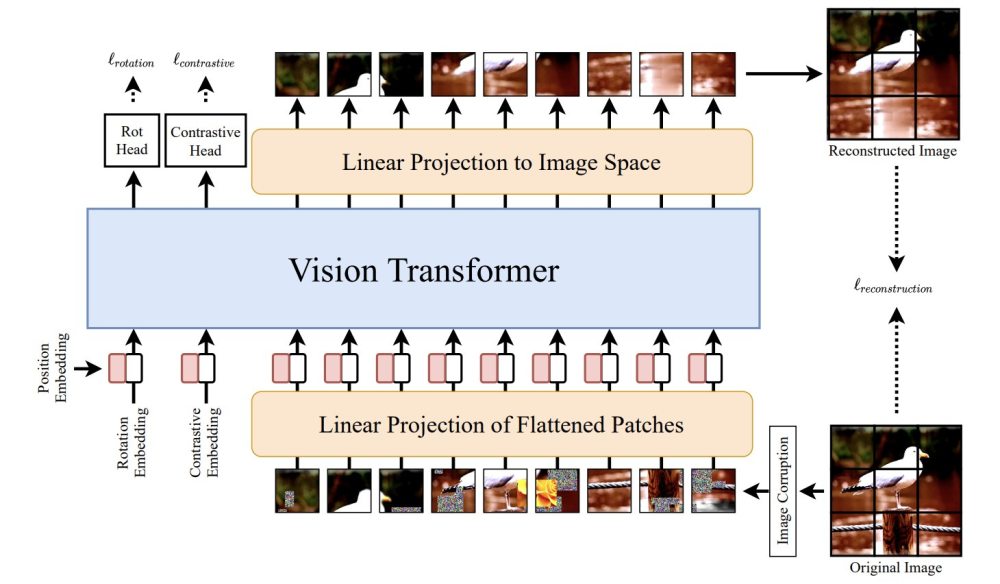

What makes ViTs "better" than the previous methods is its computational analysis speed, because it is very data hungry but at the same eats pretty fast! That's really actually it... So, ViTs are more of a powerhouse that require lots of power, lots of data, crunches through them quickly, and eventually gives great results, but eventually; diminishing returns will hit us hard. In any case though, ViTs are best if you have a large enough dataset.

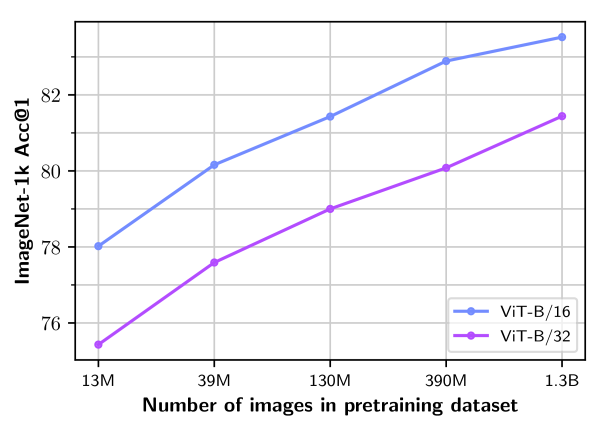

# YOLOv3 IMPLEMENTATION

With all the previous preparations out of the way, it is now time to finally implement the algorithm we want to use for object-detection, and go more in-depth in how the architecture works.

## More Preliminary Technicalities

Yes. We're in the implementation section but I still need to cover some preliminary implementation technicalities _that may or may not be used at all even_...

### Bounding box description format

Don't forget to use the same format for describing bounding boxes everywhere. Either two opposite corners (which two?) or center and width and height, etc..

### Prediction scoring

There are many metrics that can be used to score how good a prediction is relative to the target it is attempting to predict. I have already used this metric unknowingly in my lane detector implementation of phase 1 in some version of its pipeline where I evaluated whether the new detection was good enough compared to the previous one using this metric for error measurement, compared with other potential results to pick the best.

The method is very simple, its name is **intersection over union** and that almost covers everything you need to know about it. A percentage above 50% is considered okay, 70% is a very acceptable result, and 90% is near-perfect; striving to get more than that would lead to diminishing returns.

Let's assume that we use four values to represent our bouning boxes, being the x and y coordinates of the topleft corner as well as those of the bottomright coroner. To find the four values of their intersection, we can easily get them with the following equations
- The $X$ of the topleft corner in the intersection will be $max(target[0], target[0])$
- The $Y$ of the topleft corner in the intersection will be $max(target[1], target[1])$
- The $X$ of the bottomright corner in the intersection will be $min(target[2], target[2])$
- The $Y$ of the bottomright corner in the intersection will be $min(target[3], target[3])$
- Get the intersections, if any; clamp to 0 otherwise

### Non-maximal suppression

This technique is used for multiple purposes (I also could've used it in phase 1) and for our usage here it can be used to clean up overlapping bounding boxes that detect the same object. Our target is to choose the best out of them. Obviously, the main criterion is to choose the one with the best score among those overlapping. To do so, we use the intersection over union (IoU) metric to get the error between these overlapping detections, and we set some threshold, such that when we get the IoU with some box and it turns out higher than the set threshold, the box with the lower score is removed. A high IoU mean they're overlapping strongly, hence one needs to go. NMS should be done per class. It would also be best to remove boxes with very low scores from the get-go.

### Mean average precision

This is the "most common metric used in DL to evaluate object detection models". Its steps are as follows:
1. Get all box predictions
2. Get IoU between target and prediction, determine whether it is a correct prediction or not
3. Get the number of correct predictions from (2) and divide it by the total number of PREDICTED bounding boxes; this is **precision**
4. Get the number of correct predictions from (2) and divide it by the total number of TARGET bounding boxes; this is **recall**
5. The mean average precision (mAP) is the sum of (3) and (4) by two (i.e., their average)
6. Re-do all the previous steps after applying different IoU values and get the average mAP value of them all

The final result is to be represented in the form: **mAP @ 0.5:0.05:0.95**, which means the average of mAP values for IoUs from 0.5 to 0.95 using a step-size of 0.05

### How it works

As mentioned before, we split it into a grid. But first, we need to resize it to fit the algorithm's scales, in multiples of 32. For example, 416x416. The algorithm itself analyzes the image at three different stride values, 32, 16, and 8. That is why the image needs to be of dimensions divisible by 32. This implicitly includes divisibilty by 16 and 8 as well anyway. The following figure visualizes the description of the architecture and how it processes the image at these different scales...

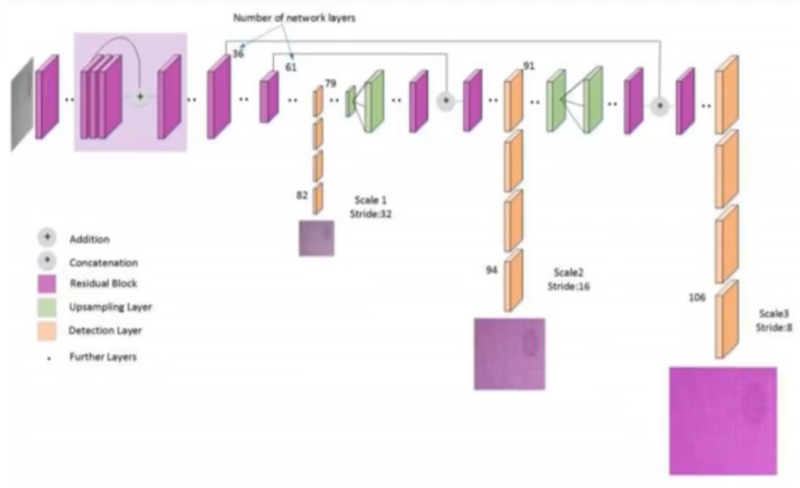

***Not sure what the numbers on the layers mean, need to search (no internet right now sadly)***

### To-do

- Need to use cv2.dnn.blobFromImage, what does it do though?
- Draw detected objects to the left?
- Debugging mode not necessary for YOLO implementation
- The output is a vector of whether a car is detected or not + four values representing the center of the object that was detected (center coordinates + width and height) + other classes...
    - Those other classes are because we'll be using the pre-trained-on coco dataset which classifies 80 classes, not just cars, but we only want the cars; so we'll have vector of length 85
    - They work with a one-hot encoding
- We'll need to do NMS for the multiple responses in the output of YOLOv3

## Code

### Imports

In [94]:
import macros

import os
import cv2
import numpy as np

### Load YOLO weights and configuration, and coco names

In [95]:
yolo_weights = os.path.join("..", "YOLOv3-416", "yolov3.weights")
yolo_cfg = os.path.join("..", "YOLOv3-416", "yolov3.cfg")

### Use configuration and weights to construct neural network

In [96]:
net = cv2.dnn.readNetFromDarknet(yolo_cfg, yolo_weights)
layers = net.getLayerNames()

for i, layer in enumerate(layers):
    if "yolo" in layer or "upsample" in layer:
        print(f'{i}:', layer)

output_layers_indices = net.getUnconnectedOutLayers()
output_layers = [layers[index-1] for index in output_layers_indices]

print(output_layers)

199: yolo_82
204: upsample_85
226: yolo_94
231: upsample_97
253: yolo_106
['yolo_82', 'yolo_94', 'yolo_106']


### Let's test on a single image

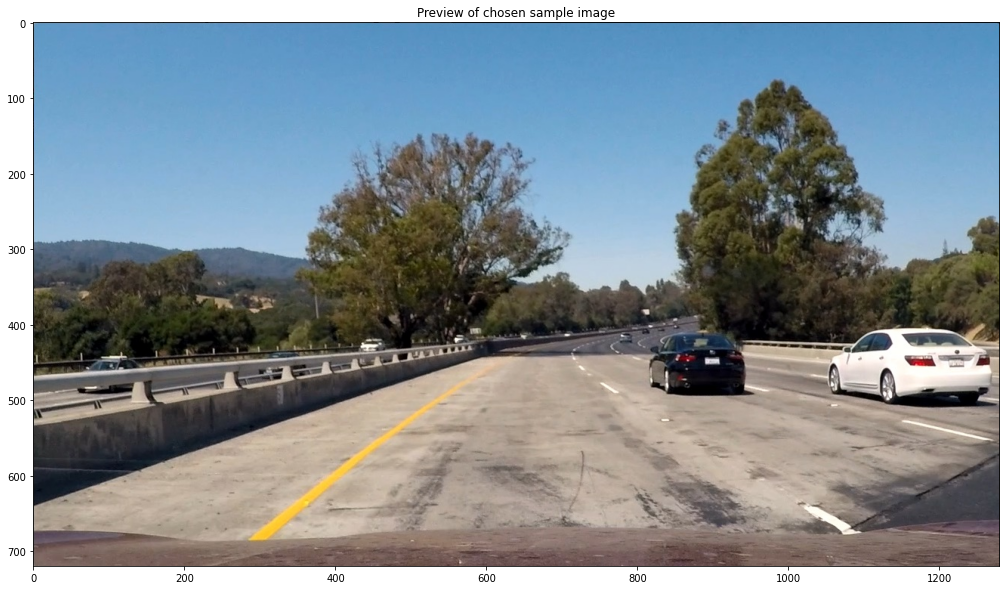

In [97]:
test_image_BGR = macros.load_image("./assets/test_images/test1.jpg")
HEIGHT, WIDTH = np.shape(test_image_BGR)[:2] # Don't need channel
macros.initialize_preview(WIDTH, HEIGHT, preview_size_factor=1)
test_image_RGB = cv2.cvtColor(test_image_BGR, cv2.COLOR_BGR2RGB)
macros.show(test_image_RGB, 'Preview of chosen sample image')

In [101]:
blob = cv2.dnn.blobFromImage(test_image_BGR, 1/255.0, (416, 416), crop=False)
net.setInput(blob)
net_outputs = net.forward(output_layers)

print(len(net_outputs))
# Expecting 3, for the 3 output layers on the 3 different scales

bounding_boxes_to_draw = []
bounding_boxes_confidences = []

for output in net_outputs:
    
    print(output.shape)
    # Expecting cells that were extracted from the grid (blob) that we made, each having the 85-cell vector mentioned above

    for cell in output:
        detection = cell[4]
        bounding_box = cell[0:4]
        classes_confidences = cell[5:]
        # print(detection)
        # print(bounding_box)
        # print(classes_confidences)
        # So, let's get the winner class out of each detection
        winner_class = np.argmax(classes_confidences) # returns indices of max values in vector
        confidence_of_winner_class = classes_confidences[winner_class]
        if (detection > 0.5 and confidence_of_winner_class > 0.8):
            bounding_boxes_confidences.append(confidence_of_winner_class)
            print(winner_class)
            # The winner class in this case is 2, and if we go to coco names we find that class 2 (i.e. #3) is car
            # The coordinates of the bounding box are given as percentages of the image's resolution, so...
            bounding_box_upsampled = (bounding_box * np.array([WIDTH, HEIGHT, WIDTH, HEIGHT])).astype("int")
            print(bounding_box_upsampled)
            # It's time to draw the rectangle... but wait, the coordinates here are box center + box dimensions
            # Need to convert to corner coordinates; namely topleft and bottomright corners
            bounding_box_ready_to_draw = [
                int(bounding_box_upsampled[0] - bounding_box_upsampled[2]/2), # topleft_x
                int(bounding_box_upsampled[1] - bounding_box_upsampled[3]/2), # topleft_y
                int(bounding_box_upsampled[0] + bounding_box_upsampled[2]/2), # bottright_x
                int(bounding_box_upsampled[1] + bounding_box_upsampled[3]/2), # bottright_y
            ]
            print(bounding_box_ready_to_draw)
            bounding_boxes_to_draw.append(bounding_box_ready_to_draw)
            

3
(507, 85)
(2028, 85)
2
[878 454 128  80]
[814, 414, 942, 494]
2
[879 454 133  76]
[812, 416, 945, 492]
2
[887 455 131  77]
[821, 416, 952, 493]
2
[1163  455  214  105]
[1056, 402, 1270, 507]
(8112, 85)


Of course, as mentioned earlier, the problem of multiple responses occurs in this algorithm, and to defeat it, we need to do non-maximal suppression. Thankfully, cv2 provides an easy way to do so.

In [145]:
print(bounding_boxes_to_draw)
print(bounding_boxes_confidences)
bounding_boxes_nms_indices = cv2.dnn.NMSBoxes(bounding_boxes_to_draw, bounding_boxes_confidences, 0.6, 0.8)
print(len(bounding_boxes_nms_indices))

[[814, 414, 942, 494], [812, 416, 945, 492], [821, 416, 952, 493], [1056, 402, 1270, 507]]
[0.95286924, 0.9922012, 0.9126863, 0.9958176]
2


### Time to draw!

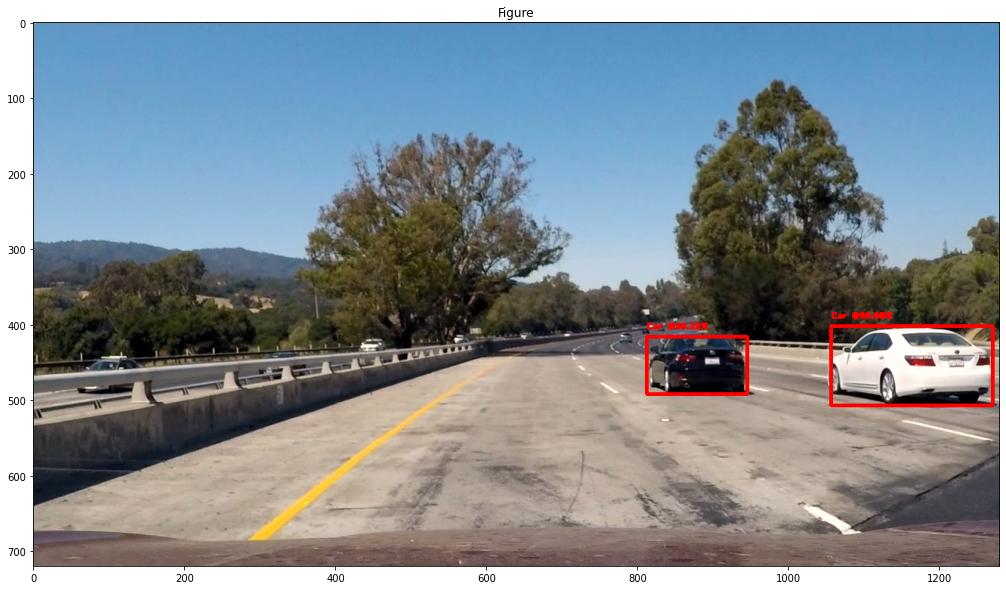

In [146]:
result_image_RGB = np.copy(test_image_RGB)
for i in bounding_boxes_nms_indices:
    box = bounding_boxes_to_draw[i]
    cv2.rectangle(result_image_RGB, box[:2], box[2:4], (255, 0, 0), 4)
    cv2.putText(result_image_RGB, f'Car @{int(10000*bounding_boxes_confidences[i])/100}%', (box[0], box[1] - 10),\
        cv2.FONT_HERSHEY_PLAIN, 0.75, (255, 0, 0), 2)
    
macros.show(result_image_RGB)

### Let's try the other test images

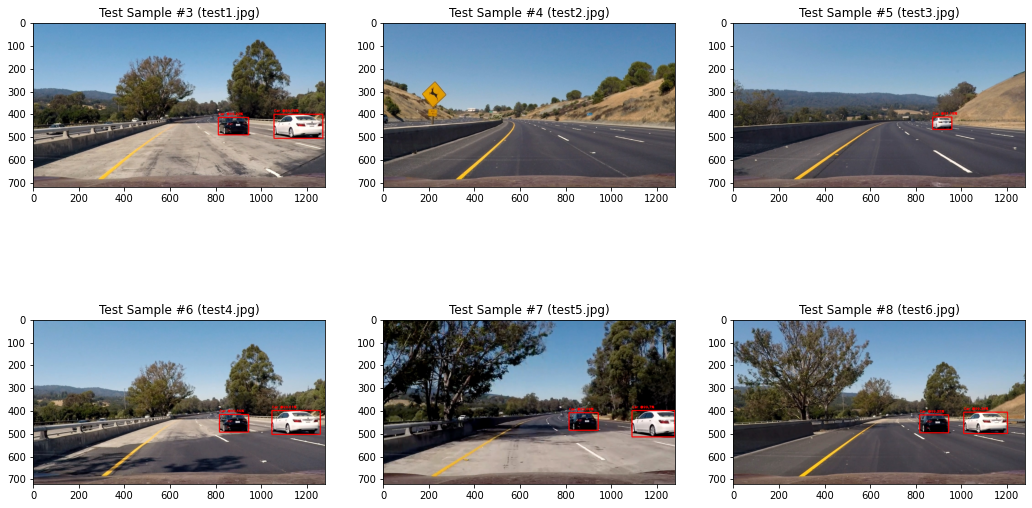

In [158]:
import pipeline_phase2

test_i = []
for i in range(1, 7):

    test_image_BGR_i = macros.load_image(f"./assets/test_images/test{i}.jpg", (WIDTH, HEIGHT))
    test_image_RGB_i = cv2.cvtColor(test_image_BGR_i, cv2.COLOR_BGR2RGB)
    bounding_boxes_to_draw, bounding_boxes_confidences, bounding_boxes_nms_indices =\
        pipeline_phase2.detect_car(test_image_BGR_i) 
        
    for j in bounding_boxes_nms_indices:
        box = bounding_boxes_to_draw[j]
        cv2.rectangle(test_image_RGB_i, box[:2], box[2:4], (255, 0, 0), 4)
        cv2.putText(test_image_RGB_i,
                    f'Car @{int(10000*bounding_boxes_confidences[j])/100}%',
                    (box[0], box[1] - 10),
                    cv2.FONT_HERSHEY_PLAIN,
                    1, (255, 0, 0), 2)
        
    test_i.append([test_image_RGB_i, f"Test Sample #{i+2} (test{i}.jpg)"])

macros.grid_plot(test_i, rows=2)

### And a few more

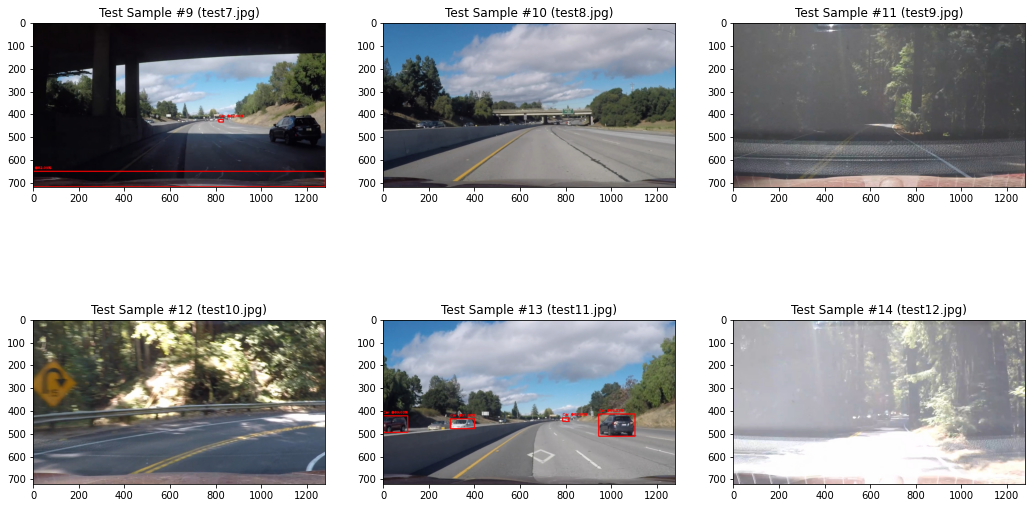

In [157]:
import pipeline_phase2

test_i = []
for i in range(7, 13):

    test_image_BGR_i = macros.load_image(f"./assets/test_images/test{i}.jpg", (WIDTH, HEIGHT))
    test_image_RGB_i = cv2.cvtColor(test_image_BGR_i, cv2.COLOR_BGR2RGB)
    bounding_boxes_to_draw, bounding_boxes_confidences, bounding_boxes_nms_indices =\
        pipeline_phase2.detect_car(test_image_BGR_i) 
        
    for j in bounding_boxes_nms_indices:
        box = bounding_boxes_to_draw[j]
        cv2.rectangle(test_image_RGB_i, box[:2], box[2:4], (255, 0, 0), 4)
        cv2.putText(test_image_RGB_i,
                    f'Car @{int(10000*bounding_boxes_confidences[j])/100}%',
                    (box[0], box[1] - 10),
                    cv2.FONT_HERSHEY_PLAIN,
                    1, (255, 0, 0), 2)
        
    test_i.append([test_image_RGB_i, f"Test Sample #{i+2} (test{i}.jpg)"])

macros.grid_plot(test_i, rows=2)

## References

- https://www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU
- https://towardsdatascience.com/four-common-types-of-neural-network-layers-c0d3bb2a966c
- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
- https://www.youtube.com/playlist?list=PLhhyoLH6Ijfw0TpCTVTNk42NN08H6UvNq
- https://www.youtube.com/watch?v=LHXXI4-IEns
- https://www.ibm.com/cloud/learn/recurrent-neural-networks
- https://towardsdatascience.com/transformers-explained-visually-part-1-overview-of-functionality-95a6dd460452
- https://towardsdatascience.com/transformers-explained-visually-part-2-how-it-works-step-by-step-b49fa4a64f34
- https://towardsdatascience.com/transformers-explained-visually-part-3-multi-head-attention-deep-dive-1c1ff1024853
- https://towardsdatascience.com/transformers-explained-visually-not-just-how-but-why-they-work-so-well-d840bd61a9d3
- https://www.youtube.com/watch?v=4Bdc55j80l8
- https://www.youtube.com/watch?v=aq0jgXrsOGE
- J. -a. Kim, J. -Y. Sung and S. -h. Park, "Comparison of Faster-RCNN, YOLO, and SSD for Real-Time Vehicle Type Recognition," 2020 IEEE International Conference on Consumer Electronics - Asia (ICCE-Asia), 2020, pp. 1-4, doi: 10.1109/ICCE-Asia49877.2020.9277040.
- *And I may have forgotten other sources, sorry*